# Pymaceuticals

* Of all the drugs tested, Capomulin is the only one that reduced tumor volume over the course of 45 days. Tumor volume was reduced by 19.5% with Capomulin treatment. Capomulin is also most effective in limiting tumor metastatic sites and yeilds the highest survival rate.

* Ketapril performed similarly to placebo in both its effect on tumor metastatic sites and subject survival rate. This drug is considered ineffective but not harmful to the experimental subjects.

* Infubinol showed moderate effect on lowering metastatic sites, but led to lower survival rate compared to placebo. Therefore this drug can potentially have toxic effect on its subjects.

In [1]:
# Dependencies and Setup
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from scipy.stats import sem

# Hide warning messages in notebook
import warnings
warnings.filterwarnings('ignore')

# File to Load (Remember to Change These)
mouse_drug_data_to_load = "data/mouse_drug_data.csv"
clinical_trial_data_to_load = "data/clinicaltrial_data.csv"

# Read the Mouse and Drug Data and the Clinical Trial Data
mousedrug_df = pd.read_csv(mouse_drug_data_to_load)
clinicaltrial_df = pd.read_csv(clinical_trial_data_to_load)
mousedrug_df.head()

# Combine the data into a single dataset
pharma_data = pd.merge(clinicaltrial_df, mousedrug_df, how='left', on="Mouse ID")

# Display the data table for preview
pharma_data.head()

pharma_data=pharma_data.rename(columns={"Tumor Volume (mm3)":"Tumor Vol"})
pharma_data.head()

,Mouse ID,Timepoint,Tumor Vol,Metastatic Sites,Drug
0,b128,0,45.0,0,Capomulin
1,f932,0,45.0,0,Ketapril
2,g107,0,45.0,0,Ketapril
3,a457,0,45.0,0,Ketapril
4,c819,0,45.0,0,Ketapril


## Tumor Response to Treatment

In [2]:
# Store the Mean Tumor Volume Data Grouped by Drug and Timepoint 
meantumorvol = pharma_data.groupby(["Drug", "Timepoint"])["Tumor Vol"].mean()

# Convert to DataFrame
tumorvol_df = pd.DataFrame({"Tumor Volume":meantumorvol}).reset_index()

# Preview DataFrame
tumorvol_df.head()

,Drug,Timepoint,Tumor Volume
0,Capomulin,0,45.000000
1,Capomulin,5,44.266086
2,Capomulin,10,43.084291
3,Capomulin,15,42.064317
4,Capomulin,20,40.716325


In [3]:
# Store the Standard Error of Tumor Volumes Grouped by Drug and Timepoint
tumorvol_sem = pharma_data.groupby(["Drug","Timepoint"])["Tumor Vol"].sem()

# Convert to DataFrame
tumorvol_sem_df = pd.DataFrame({"Tumor Vol SEM":tumorvol_sem}).reset_index() 

# Preview DataFrame
tumorvol_sem_df.head()

,Drug,Timepoint,Tumor Vol SEM
0,Capomulin,0,0.000000
1,Capomulin,5,0.448593
2,Capomulin,10,0.702684
3,Capomulin,15,0.838617
4,Capomulin,20,0.909731


In [4]:
# Minor Data Munging to Re-Format the Data Frames
# Preview that Reformatting worked
tumorpivot= tumorvol_df.pivot(index="Timepoint", columns="Drug", values="Tumor Volume")
tumorpivot.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000
5,44.266086,46.503051,47.062001,47.389175,46.796098,47.125589,47.248967,43.944859,47.527452,46.851818
10,43.084291,48.285125,49.403909,49.582269,48.694210,49.423329,49.101541,42.531957,49.463844,48.689881
15,42.064317,50.094055,51.296397,52.399974,50.933018,51.359742,51.067318,41.495061,51.529409,50.779059
20,40.716325,52.157049,53.197691,54.920935,53.644087,54.364417,53.346737,40.238325,54.067395,53.170334


In [5]:
#Get timept, tumor vol, sem for 4 drugs:

#Reset index for pivot
tumorpivot= tumorvol_df.pivot(index="Timepoint", columns="Drug", values="Tumor Volume").reset_index()

place_sem = tumorvol_sem_df.loc[tumorvol_sem_df["Drug"]=="Placebo"]["Tumor Vol SEM"]
infu_sem = tumorvol_sem_df.loc[tumorvol_sem_df["Drug"]=="Infubinol"]["Tumor Vol SEM"]
capo_sem = tumorvol_sem_df.loc[tumorvol_sem_df["Drug"]=="Capomulin"]["Tumor Vol SEM"]
keta_sem = tumorvol_sem_df.loc[tumorvol_sem_df["Drug"]=="Ketapril"]["Tumor Vol SEM"]

timept = tumorpivot["Timepoint"]

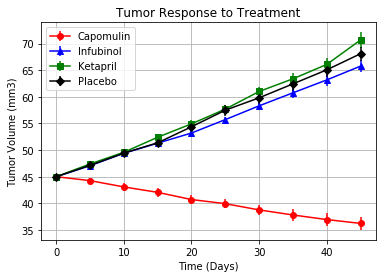

In [6]:
#Generate Plot

fig, ax = plt.subplots()
ax.errorbar(timept, tumorpivot["Capomulin"], capo_sem, color= "red", fmt="-o")
ax.errorbar(timept, tumorpivot["Infubinol"], infu_sem, color= "blue", fmt="-^")
ax.errorbar(timept, tumorpivot["Ketapril"], keta_sem, color= "green", fmt="-s")
ax.errorbar(timept, tumorpivot["Placebo"], place_sem, color= "black", fmt="-D")

ax.set_xlabel("Time (Days)")
ax.set_ylabel("Tumor Volume (mm3)")
ax.set_title("Tumor Response to Treatment")
ax.grid()
plt.legend(("Capomulin","Infubinol","Ketapril", "Placebo"))

plt.savefig("Tumor_Treatment_Response.png")
plt.show()

## Metastatic Response to Treatment 

In [7]:
# Store the Mean Met. Site Data Grouped by Drug and Timepoint 
mean_met_site=pharma_data.groupby(["Drug", "Timepoint"])["Metastatic Sites"].mean()

# Convert to DataFrame
mean_metsite_df = pd.DataFrame({"Metastatic Sites":mean_met_site}).reset_index()

# Preview DataFrame
mean_metsite_df.head()

,Drug,Timepoint,Metastatic Sites
0,Capomulin,0,0.000000
1,Capomulin,5,0.160000
2,Capomulin,10,0.320000
3,Capomulin,15,0.375000
4,Capomulin,20,0.652174


In [8]:
# Store the Standard Error associated with Met. Sites Grouped by Drug and Timepoint 
metsite_sem = pharma_data.groupby(["Drug", "Timepoint"])["Metastatic Sites"].sem()

# Convert to DataFrame
metsite_sem_df = pd.DataFrame({"Metastatic Site SEM":metsite_sem}).reset_index() 

# Preview DataFrame
metsite_sem_df.head()

,Drug,Timepoint,Metastatic Site SEM
0,Capomulin,0,0.000000
1,Capomulin,5,0.074833
2,Capomulin,10,0.125433
3,Capomulin,15,0.132048
4,Capomulin,20,0.161621


In [9]:
# Minor Data Munging to Re-Format the Data Frames
# Preview that Reformatting worked
tumorpivotsem= mean_metsite_df.pivot(index="Timepoint", columns="Drug", values="Metastatic Sites")
tumorpivotsem.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.160000,0.380952,0.280000,0.304348,0.260870,0.375000,0.320000,0.120000,0.240000,0.166667
10,0.320000,0.600000,0.666667,0.590909,0.523810,0.833333,0.565217,0.250000,0.478261,0.500000
15,0.375000,0.789474,0.904762,0.842105,0.857143,1.250000,0.764706,0.333333,0.782609,0.809524
20,0.652174,1.111111,1.050000,1.210526,1.150000,1.526316,1.000000,0.347826,0.952381,1.294118


In [10]:
#Get timept, tumor vol, sem for 4 drugs:

#Reset index
tumorpivotsem= mean_metsite_df.pivot(index="Timepoint", columns="Drug", values="Metastatic Sites").reset_index() 

place_metsem = metsite_sem_df.loc[metsite_sem_df["Drug"]=="Placebo"]["Metastatic Site SEM"]
infu_metsem = metsite_sem_df.loc[metsite_sem_df["Drug"]=="Infubinol"]["Metastatic Site SEM"]
capo_metsem = metsite_sem_df.loc[metsite_sem_df["Drug"]=="Capomulin"]["Metastatic Site SEM"]
keta_metsem = metsite_sem_df.loc[metsite_sem_df["Drug"]=="Ketapril"]["Metastatic Site SEM"]

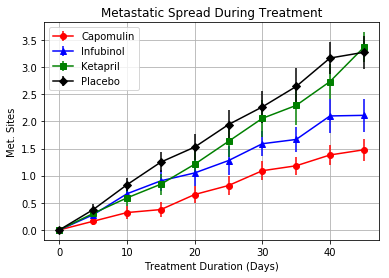

In [11]:
#Generate plot

fig, ax = plt.subplots()

ax.errorbar(timept, tumorpivotsem["Capomulin"], capo_metsem, color = "red", fmt="-o")
ax.errorbar(timept, tumorpivotsem["Infubinol"], infu_metsem, color= "blue", fmt="-^")
ax.errorbar(timept, tumorpivotsem["Ketapril"], keta_metsem, color="green", fmt="-s")
ax.errorbar(timept, tumorpivotsem["Placebo"], place_metsem, color="black",fmt="-D")

ax.set_xlabel("Treatment Duration (Days)")
ax.set_ylabel("Met. Sites")
ax.set_title("Metastatic Spread During Treatment")
ax.grid()
plt.legend(("Capomulin","Infubinol","Ketapril", "Placebo"))

plt.savefig("Metastatic_Spread.png")
plt.show()

## Survival Rates 

In [12]:
# Store the Count of Mice Grouped by Drug and Timepoint (W can pass any metric)
micecount = pharma_data.groupby(["Drug", "Timepoint"])["Mouse ID"].count()

# Convert to DataFrame
mice_count_df = pd.DataFrame({"Mice Count":micecount}).reset_index()

# Preview DataFrame
mice_count_df.head()

,Drug,Timepoint,Mice Count
0,Capomulin,0,25
1,Capomulin,5,25
2,Capomulin,10,25
3,Capomulin,15,24
4,Capomulin,20,23


In [13]:
# Minor Data Munging to Re-Format the Data Frames
mice_count = mice_count_df.pivot(index="Timepoint", columns="Drug", values="Mice Count").reset_index() 

# Preview the Data Frame
mice_count.head()

Drug,Timepoint,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
0,0,25,25,25,25,25,25,26,25,26,25
1,5,25,21,25,23,23,24,25,25,25,24
2,10,25,20,21,22,21,24,23,24,23,22
3,15,24,19,21,19,21,20,17,24,23,21
4,20,23,18,20,19,20,19,17,23,21,17


In [14]:
#Calculate survival rate for each drug
x_axis= mice_count["Timepoint"]

y_placebo = (mice_count["Placebo"]/mice_count["Placebo"][0])*100
y_infu = (mice_count["Infubinol"]/mice_count["Infubinol"][0])*100
y_capo = (mice_count["Capomulin"]/mice_count["Capomulin"][0])*100
y_keta = (mice_count["Ketapril"]/mice_count["Ketapril"][0])*100

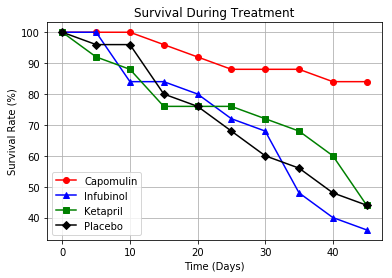

In [15]:
#Plot

plt.plot(x_axis, y_capo, color= "red", marker="o")
plt.plot(x_axis, y_infu, color= "blue", marker="^")
plt.plot(x_axis, y_keta, color= "green", marker="s") 
plt.plot(x_axis, y_placebo, color= "black",marker="D")

plt.title("Survival During Treatment")
plt.xlabel("Time (Days)")
plt.ylabel("Survival Rate (%)")
plt.grid()
plt.legend(("Capomulin","Infubinol","Ketapril", "Placebo"))

plt.savefig("Survival_Rate.png")
plt.show()

## Summary Bar Graph 

In [16]:
tumorpivot= tumorvol_df.pivot(index="Timepoint", columns="Drug", values="Tumor Volume")
tumorpivot.head(10)

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000
5,44.266086,46.503051,47.062001,47.389175,46.796098,47.125589,47.248967,43.944859,47.527452,46.851818
10,43.084291,48.285125,49.403909,49.582269,48.694210,49.423329,49.101541,42.531957,49.463844,48.689881
15,42.064317,50.094055,51.296397,52.399974,50.933018,51.359742,51.067318,41.495061,51.529409,50.779059
20,40.716325,52.157049,53.197691,54.920935,53.644087,54.364417,53.346737,40.238325,54.067395,53.170334
25,39.939528,54.287674,55.715252,57.678982,56.731968,57.482574,55.504138,38.974300,56.166123,55.432935
30,38.769339,56.769517,58.299397,60.994507,59.559509,59.809063,58.196374,38.703137,59.826738,57.713531
35,37.816839,58.827548,60.742461,63.371686,62.685087,62.420615,60.350199,37.451996,62.440699,60.089372
40,36.958001,61.467895,63.162824,66.068580,65.600754,65.052675,63.045537,36.574081,65.356386,62.916692


In [17]:
# Calculate the percent changes for each drug
cols = tumorpivot.columns
percent_change = 100*(tumorpivot[cols].iloc[-1]/tumorpivot[cols].iloc[0]-1)
percent_change

Drug
Capomulin   -19.475303
Ceftamin     42.516492
Infubinol    46.123472
Ketapril     57.028795
Naftisol     53.923347
Placebo      51.297960
Propriva     47.241175
Ramicane    -22.320900
Stelasyn     52.085134
Zoniferol    46.579751
dtype: float64

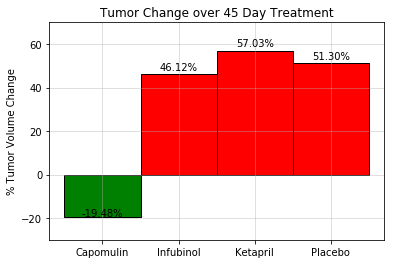

In [93]:
# Splice the data between passing and failing drugs
passing = percent_change < 0

drug_list = ['Capomulin','Infubinol','Ketapril','Placebo']
percent_change_list = [(percent_change[drug])for drug in drug_list]

change_plt = plt.bar(drug_list, percent_change_list, width=-1, 
                     align='center',color=passing.map({True:'g',False:'r'}), edgecolor= "black")

#Format and labels
plt.grid(True, alpha =0.5)
plt.ylim(-30,70)
plt.yticks(np.arange(-20, 65, 20))

plt.ylabel("% Tumor Volume Change")
plt.title('Tumor Change over 45 Day Treatment')

# Use functions to label the percentages of changes
def autolabel(rects):
    for i,rect in enumerate(rects):
        height = rect.get_height()
        plt.text(rect.get_x()+rect.get_width()/2., 1.02*height, '%.2f'% (percent_change_list[i])+ "%",
            ha='center', va='bottom')

#Call function to implement calls
autolabel(change_plt)

plt.savefig("Overall_Tumor_Change.png")
plt.show()